In [1]:
import pandas as pd
import numpy as np
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
! pip install geocoder
import geocoder

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    ------------------------------------------------------------
                       

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/haanjiankur/Capstone-Project---The-Battle-of-Neighborhoods/master/zomato.csv',encoding='ISO-8859-1')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [3]:
df_india = df[df['Country Code'] == 1]
df_Gurgaon = df_india[df_india['City'] == 'Gurgaon']
df_Gurgaon.reset_index(drop=True, inplace=True)
df_Gurgaon.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,18396451,K Lab,1,Gurgaon,"Shop GF-18, ILD Trade Centre, Sector 47, Near ...","ILD Trade Centre Mall, Sohna Road","ILD Trade Centre Mall, Sohna Road, Gurgaon",77.039310,28.424831,"Cafe, Beverages",...,Indian Rupees(Rs.),No,No,No,No,1,3.4,Orange,Average,16
1,18237941,Pind Balluchi,1,Gurgaon,"112/112-A, 1st Floor, ILD Trade Centre, Near S...","ILD Trade Centre Mall, Sohna Road","ILD Trade Centre Mall, Sohna Road, Gurgaon",77.039220,28.424913,"North Indian, Mughlai",...,Indian Rupees(Rs.),Yes,Yes,No,No,2,2.7,Orange,Average,80
2,2787,Punjab Grill,1,Gurgaon,"3rd Floor, Ambience Mall, Gurgaon","Ambience Mall, Gurgaon","Ambience Mall, Gurgaon, Gurgaon",77.097118,28.503077,"North Indian, Mughlai",...,Indian Rupees(Rs.),Yes,Yes,No,No,4,4.3,Green,Very Good,1887
3,3431,Zambar,1,Gurgaon,"3rd Floor, Ambience Mall, Gurgaon","Ambience Mall, Gurgaon","Ambience Mall, Gurgaon, Gurgaon",77.097185,28.502613,"South Indian, Seafood, Kerala",...,Indian Rupees(Rs.),Yes,Yes,No,No,3,4.0,Green,Very Good,802
4,303699,Cakes & More,1,Gurgaon,"27, Ground Floor, Ansal Plaza Mall, Palam Viha...","Ansal Plaza Mall, Palam Vihar","Ansal Plaza Mall, Palam Vihar, Gurgaon",77.042009,28.511416,Bakery,...,Indian Rupees(Rs.),No,No,No,No,1,3.0,Orange,Average,4


In [4]:
df_Res= df_Gurgaon[df_Gurgaon.Longitude !=0.000000][['Restaurant Name','Locality','Longitude','Latitude','Cuisines','Aggregate rating','Rating text','Votes']]

In [5]:
df_Res = df_Res[df_Res['Aggregate rating'] !=0.0]

In [6]:
df_Res.head()

,Restaurant Name,Locality,Longitude,Latitude,Cuisines,Aggregate rating,Rating text,Votes
0,K Lab,"ILD Trade Centre Mall, Sohna Road",77.039310,28.424831,"Cafe, Beverages",3.4,Average,16
1,Pind Balluchi,"ILD Trade Centre Mall, Sohna Road",77.039220,28.424913,"North Indian, Mughlai",2.7,Average,80
2,Punjab Grill,"Ambience Mall, Gurgaon",77.097118,28.503077,"North Indian, Mughlai",4.3,Very Good,1887
3,Zambar,"Ambience Mall, Gurgaon",77.097185,28.502613,"South Indian, Seafood, Kerala",4.0,Very Good,802
4,Cakes & More,"Ansal Plaza Mall, Palam Vihar",77.042009,28.511416,Bakery,3.0,Average,4


In [7]:
Gurgaon_Rest = folium.Map(location=[28.45, 77.02], zoom_start=12)

X = df_Res['Latitude']
Y = df_Res['Longitude']
Z = np.stack((X, Y), axis=1)

kmeans = KMeans(n_clusters=5, random_state=0).fit(Z)

clusters = kmeans.labels_
colors = ['red', 'green', 'blue', 'yellow','orange']
df_Res ['Cluster'] = clusters

for latitude, longitude, Locality, cluster in zip(df_Res['Latitude'], df_Res['Longitude'], df_Res['Locality'], df_Res['Cluster']):
    label = folium.Popup(Locality, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(Gurgaon_Rest)  

Gurgaon_Rest

In [8]:
df_Res.head()

,Restaurant Name,Locality,Longitude,Latitude,Cuisines,Aggregate rating,Rating text,Votes,Cluster
0,K Lab,"ILD Trade Centre Mall, Sohna Road",77.039310,28.424831,"Cafe, Beverages",3.4,Average,16,2
1,Pind Balluchi,"ILD Trade Centre Mall, Sohna Road",77.039220,28.424913,"North Indian, Mughlai",2.7,Average,80,2
2,Punjab Grill,"Ambience Mall, Gurgaon",77.097118,28.503077,"North Indian, Mughlai",4.3,Very Good,1887,0
3,Zambar,"Ambience Mall, Gurgaon",77.097185,28.502613,"South Indian, Seafood, Kerala",4.0,Very Good,802,0
4,Cakes & More,"Ansal Plaza Mall, Palam Vihar",77.042009,28.511416,Bakery,3.0,Average,4,1


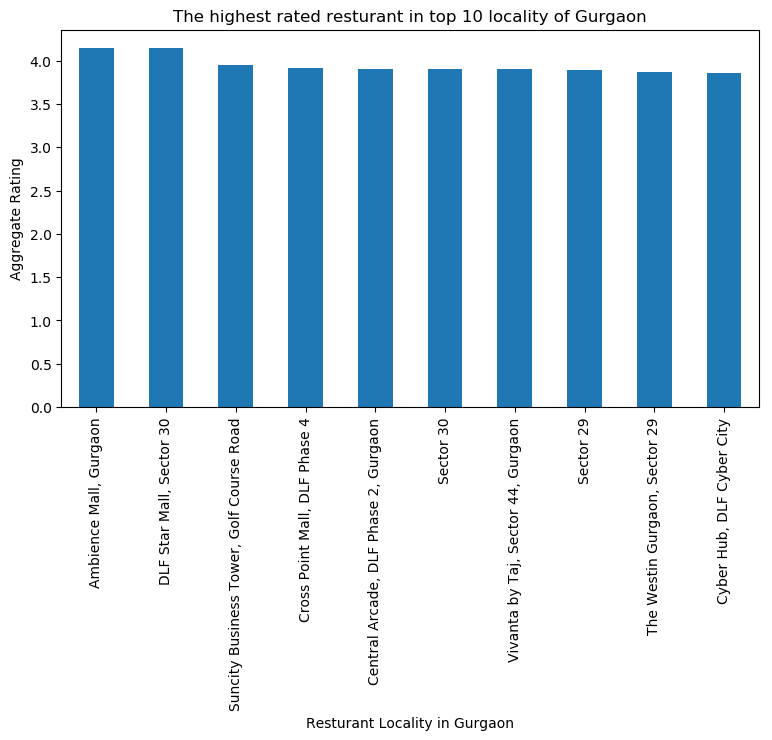

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The highest rated resturant in top 10 locality of Gurgaon')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Aggregate rating'].mean().nlargest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in Gurgaon')
#On y-axis
plt.ylabel('Aggregate Rating')
#displays the plot
plt.show()

# what places are have worst restaurants in Gurgaon?

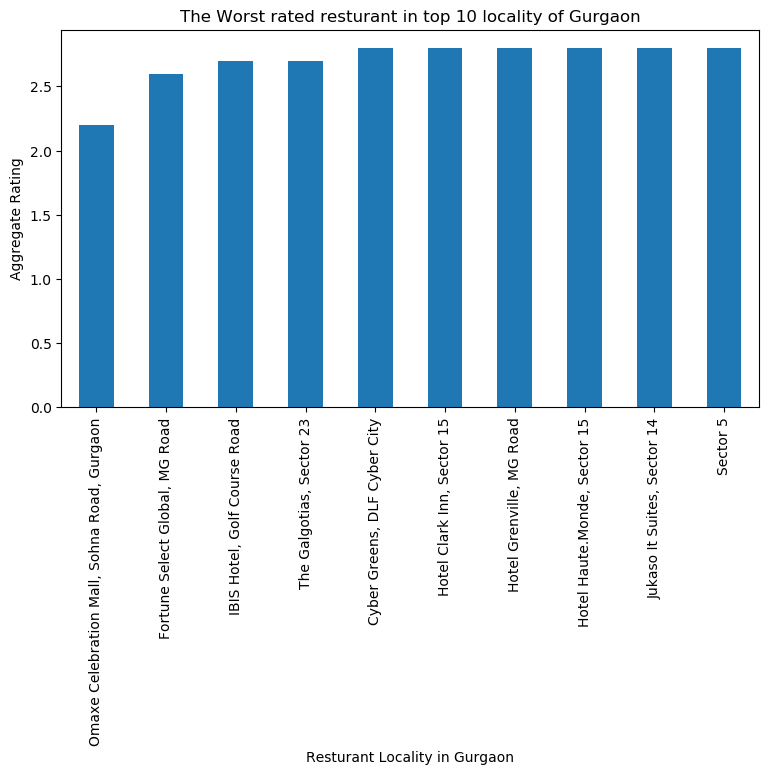

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The Worst rated resturant in top 10 locality of Gurgaon')
#On x-axis

#giving a bar plot

df_Res.groupby('Locality')['Aggregate rating'].mean().nsmallest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in Gurgaon')
#On y-axis
plt.ylabel('Aggregate Rating')

#displays the plot
plt.show()

# Which place are suitable for edible person in Gurgaon city?

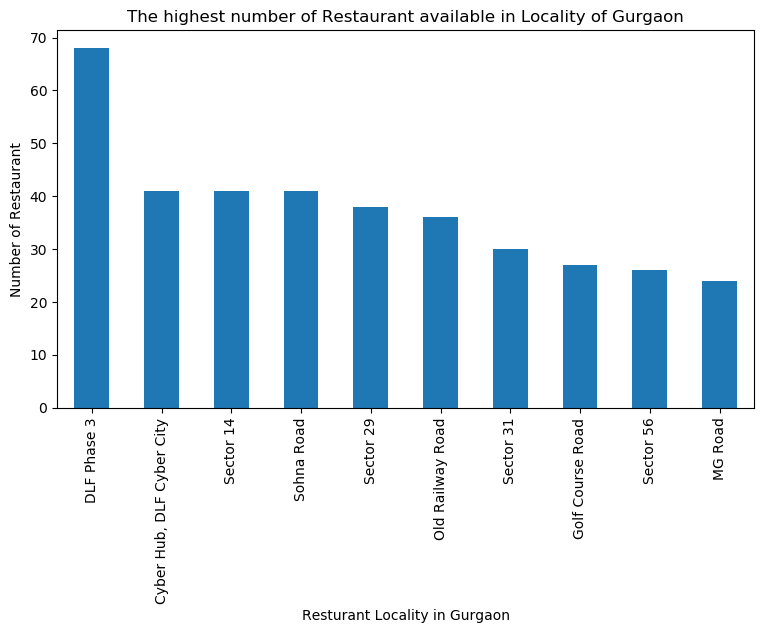

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The highest number of Restaurant available in Locality of Gurgaon')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Restaurant Name'].count().nlargest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in Gurgaon')
#On y-axis
plt.ylabel('Number of Restaurant')

#displays the plot
plt.show()

# Which place are not suitable for edible person in Gurgaon city?

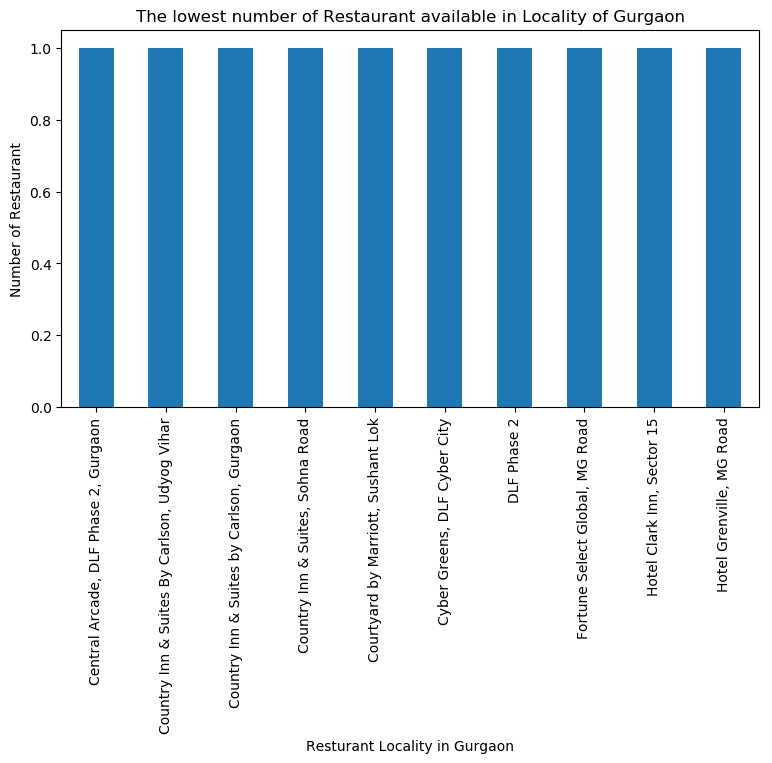

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The lowest number of Restaurant available in Locality of Gurgaon')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Restaurant Name'].count().nsmallest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in Gurgaon')
#On y-axis
plt.ylabel('Number of Restaurant')

#displays the plot
plt.show()

# What are the best places for chinese restaurant in Gurgaon city

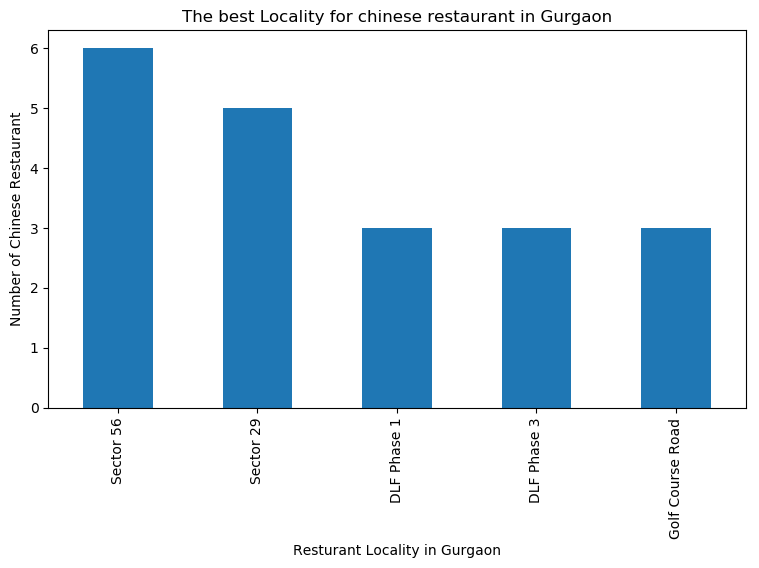

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The best Locality for chinese restaurant in Gurgaon')
#On x-axis

#giving a bar plot
df_Res[df_Res['Cuisines'].str.startswith('Chinese')].groupby('Locality')['Restaurant Name'].count().nlargest(5).plot(kind='bar')

plt.xlabel('Resturant Locality in Gurgaon')
#On y-axis
plt.ylabel('Number of Chinese Restaurant')

#displays the plot
plt.show()

# which places are the best chinese resturants in Gurgaon?

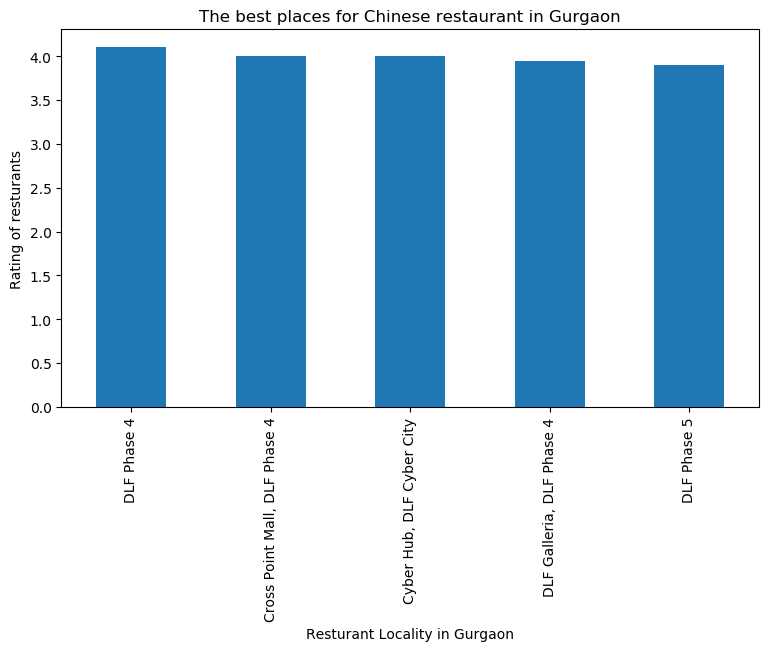

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The best places for Chinese restaurant in Gurgaon')
#On x-axis

#giving a bar plot
df_Res[df_Res['Cuisines'].str.startswith('Chinese')].groupby('Locality')['Aggregate rating'].mean().nlargest(5).plot(kind='bar')

plt.xlabel('Resturant Locality in Gurgaon')
#On y-axis
plt.ylabel('Rating of resturants')

#displays the plot
plt.show()

Data transformation
Based on Locality grouping the data

In [15]:
df_Res_Loc =  df_Res.groupby('Locality').count()['Restaurant Name'].to_frame()
df_Res_rating= df_Res.groupby('Locality')['Aggregate rating'].mean().to_frame()
d_Cuisines = df_Res.groupby(['Locality'])['Cuisines'].agg(', '.join).reset_index()
d_R = df_Res.groupby(['Locality'])['Rating text'].unique().agg(', '.join).reset_index()
d_V = df_Res.groupby(['Locality'])['Votes'].sum().to_frame()
d_Lat = df_Res.groupby('Locality').mean()['Latitude'].to_frame()
d_Lng = df_Res.groupby('Locality').mean()['Longitude'].to_frame()
df_final = pd.merge(d_Lat,d_Lng,on='Locality').merge(df_Res_Loc, on='Locality').merge(d_Cuisines, on='Locality').merge(df_Res_rating,on ='Locality').merge(d_R, on ='Locality').merge(d_V, on ='Locality')

In [16]:
df_final = df_final[df_final['Aggregate rating'] != 0.000000]
df_final.columns =['Locality','Lat','Lng', 'No_of_Restaurant','Cusines', 'Agg_Rating','Comments' ,'No_of_Votes']
df_final.head()

,Locality,Lat,Lng,No_of_Restaurant,Cusines,Agg_Rating,Comments,No_of_Votes
0,"ILD Trade Centre Mall, Sohna Road",28.424872,77.039265,2,"Cafe, Beverages, North Indian, Mughlai",3.05,Average,96
1,"Ambience Mall, Gurgaon",28.502845,77.097152,2,"North Indian, Mughlai, South Indian, Seafood, ...",4.15,Very Good,2689
2,"Ansal Plaza Mall, Palam Vihar",28.511460,77.041994,3,"Bakery, Ice Cream, Chinese",3.00,Average,19
3,Ardee City,28.441660,77.083050,3,"Japanese, Thai, Chinese, Pizza, Desserts, Raw ...",3.00,Average,65
4,"Best Western Skycity Hotel, Sector 15, Gurgaon",28.458165,77.034839,2,"Japanese, North Indian, Chinese, Continental",2.85,Average,28


In [17]:
df_final.shape

(110, 8)

# Define Foursquare Credentials and Version

In [18]:
## Define Foursquare Credentials and Version
CLIENT_ID = '5PD3GVV1S5VLT2BCR4QQC3DWNJPEVQWCLKQ23A2OG2RBJXXJ' # Foursquare ID
CLIENT_SECRET = 'XP51SYC2LY4ZMYGPRNJ5RXXBOULXLBK0NBDS3CIWTAXWVZLD' # Foursquare Secret
VERSION = '20200527' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 5PD3GVV1S5VLT2BCR4QQC3DWNJPEVQWCLKQ23A2OG2RBJXXJ
CLIENT_SECRET:XP51SYC2LY4ZMYGPRNJ5RXXBOULXLBK0NBDS3CIWTAXWVZLD


create a function to repeat the same process to all the Locality in Gurgaon

In [19]:
## create a function to repeat the same process to all the Locality in Gurgaon

def getNearbyVenues(names, latitudes, longitudes, radius=500,LIMIT = 100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Locality', 
                  'Locality Latitude', 
                  'Locality Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

# find the venues in all Gurgaon Locality

In [20]:
# find the venues in all Gurgaon Locality
Gurgaon_venues = getNearbyVenues(names=df_final['Locality'],
                                   latitudes=df_final['Lat'],
                                   longitudes=df_final['Lng']
                                  )

 ILD Trade Centre Mall, Sohna Road
Ambience Mall, Gurgaon
Ansal Plaza Mall, Palam Vihar
Ardee City
Best Western Skycity Hotel, Sector 15, Gurgaon
Central Arcade, DLF Phase 2, Gurgaon
Central Plaza Mall, Golf Course Road
Country Inn & Suites By Carlson, Udyog Vihar
Country Inn & Suites by Carlson, Gurgaon
Country Inn & Suites by Carlson, Sector 12
Country Inn & Suites, Sohna Road
Courtyard by Marriott, Sushant Lok
Cross Point Mall, DLF Phase 4
Crowne Plaza, Sector 29
Cyber Greens, DLF Cyber City
Cyber Hub, DLF Cyber City
DLF Cyber City
DLF Galleria, DLF Phase 4
DLF Mega Mall, DLF Phase 1
DLF Phase 1
DLF Phase 2
DLF Phase 3
DLF Phase 4
DLF Phase 5
DLF South Point Mall, Golf Course Road
DLF Star Mall, Sector 30
DT City Centre Mall, MG Road
DT Mega Mall, DLF Phase 1
DoubleTree by Hilton, Sector 56
Fortune Select Excalibur, Sohna Road
Fortune Select Global, MG Road
Global Foyer Mall, Golf Course Road
Golf Course Road
Hong Kong Bazaar Mall, Sector 57, Gurgaon
Hotel Clark Inn, Sector 15
Hotel

In [21]:
Gurgaon_venues.head(3000)

,Locality,Locality Latitude,Locality Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"ILD Trade Centre Mall, Sohna Road",28.424872,77.039265,Brewer Street,28.424499,77.039134,Brewery
1,"ILD Trade Centre Mall, Sohna Road",28.424872,77.039265,Decathlon Gurgaon,28.427433,77.036258,Sporting Goods Shop
2,"ILD Trade Centre Mall, Sohna Road",28.424872,77.039265,KFC,28.424789,77.038722,Fast Food Restaurant
3,"ILD Trade Centre Mall, Sohna Road",28.424872,77.039265,Sagar Ratna,28.421042,77.038509,Indian Restaurant
4,"ILD Trade Centre Mall, Sohna Road",28.424872,77.039265,Grand cinemas,28.423626,77.039422,Movie Theater
5,"ILD Trade Centre Mall, Sohna Road",28.424872,77.039265,Torgauer Brewpub,28.423641,77.039426,Brewery
6,"ILD Trade Centre Mall, Sohna Road",28.424872,77.039265,more mega store,28.426137,77.036659,Department Store
7,"ILD Trade Centre Mall, Sohna Road",28.424872,77.039265,Barbeque Nation,28.421888,77.040544,BBQ Joint
8,"ILD Trade Centre Mall, Sohna Road",28.424872,77.039265,SRS Cinemas,28.427675,77.036433,Movie Theater
9,"ILD Trade Centre Mall, Sohna Road",28.424872,77.039265,Celebration Mall,28.427339,77.036682,Shopping Mall


In [22]:
Gurgaon_venues.groupby('Locality').count()

,Locality Latitude,Locality Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Locality,,,,,,
"ILD Trade Centre Mall, Sohna Road",11,11,11,11,11,11
"Ambience Mall, Gurgaon",39,39,39,39,39,39
"Ansal Plaza Mall, Palam Vihar",4,4,4,4,4,4
Ardee City,6,6,6,6,6,6
"Best Western Skycity Hotel, Sector 15, Gurgaon",5,5,5,5,5,5
"Central Arcade, DLF Phase 2, Gurgaon",23,23,23,23,23,23
"Central Plaza Mall, Golf Course Road",14,14,14,14,14,14
"Country Inn & Suites By Carlson, Udyog Vihar",8,8,8,8,8,8
"Country Inn & Suites by Carlson, Gurgaon",12,12,12,12,12,12


In [23]:
print('There are {} uniques categories.'.format(len(Gurgaon_venues['Venue Category'].unique())))

There are 129 uniques categories.


In [24]:
## Analyze Each Locality

# one hot encoding
Gurgaon_onehot = pd.get_dummies(Gurgaon_venues[['Venue Category']], prefix="", prefix_sep="")

# add Locality column back to dataframe
Gurgaon_onehot['Locality'] = Gurgaon_venues['Locality'] 

# move Locality column to the first column
column_list = Gurgaon_onehot.columns.tolist()
column_number = int(column_list.index('Locality'))
column_list = [column_list[column_number]] + column_list[:column_number] + column_list[column_number+1:]
Gurgaon_onehot = Gurgaon_onehot[column_list]

Gurgaon_onehot.head(2000)

,Locality,American Restaurant,Arcade,Art Gallery,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bar,...,Steakhouse,Supermarket,Tapas Restaurant,Tea Room,Thai Restaurant,Tibetan Restaurant,Trail,Vegetarian / Vegan Restaurant,Whisky Bar,Wine Bar
0,"ILD Trade Centre Mall, Sohna Road",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"ILD Trade Centre Mall, Sohna Road",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"ILD Trade Centre Mall, Sohna Road",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"ILD Trade Centre Mall, Sohna Road",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"ILD Trade Centre Mall, Sohna Road",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,"ILD Trade Centre Mall, Sohna Road",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,"ILD Trade Centre Mall, Sohna Road",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,"ILD Trade Centre Mall, Sohna Road",0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,"ILD Trade Centre Mall, Sohna Road",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,"ILD Trade Centre Mall, Sohna Road",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
Gurgaon_grouped = Gurgaon_onehot.groupby('Locality').mean().reset_index()
Gurgaon_grouped

,Locality,American Restaurant,Arcade,Art Gallery,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bar,...,Steakhouse,Supermarket,Tapas Restaurant,Tea Room,Thai Restaurant,Tibetan Restaurant,Trail,Vegetarian / Vegan Restaurant,Whisky Bar,Wine Bar
0,"ILD Trade Centre Mall, Sohna Road",0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
1,"Ambience Mall, Gurgaon",0.051282,0.025641,0.000000,0.051282,0.000000,0.000000,0.000000,0.000000,0.051282,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
2,"Ansal Plaza Mall, Palam Vihar",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
3,Ardee City,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.0,0.0,0.000000,0.000000
4,"Best Western Skycity Hotel, Sector 15, Gurgaon",0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
5,"Central Arcade, DLF Phase 2, Gurgaon",0.043478,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.043478,0.043478,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
6,"Central Plaza Mall, Golf Course Road",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
7,"Country Inn & Suites By Carlson, Udyog Vihar",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
8,"Country Inn & Suites by Carlson, Gurgaon",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
9,"Country Inn & Suites by Carlson, Sector 12",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000


In [26]:
Gurgaon_grouped.shape

(109, 130)

In [27]:
## print each Locality along with the top 5 most common venues

num_top_venues = 5

for hood in Gurgaon_grouped['Locality']:
    print("----"+hood+"----")
    temp = Gurgaon_grouped[Gurgaon_grouped['Locality'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

---- ILD Trade Centre Mall, Sohna Road----
               venue  freq
0            Brewery  0.18
1      Movie Theater  0.18
2      Shopping Mall  0.18
3   Department Store  0.09
4  Indian Restaurant  0.09


----Ambience Mall, Gurgaon----
                  venue  freq
0     Indian Restaurant  0.15
1  Fast Food Restaurant  0.08
2                   Bar  0.05
3             Multiplex  0.05
4    Italian Restaurant  0.05


----Ansal Plaza Mall, Palam Vihar----
            venue  freq
0     Pizza Place  0.25
1             Gym  0.25
2  Sandwich Place  0.25
3            Café  0.25
4    Music School  0.00


----Ardee City----
                venue  freq
0   Convenience Store  0.17
1   Indian Restaurant  0.17
2     Thai Restaurant  0.17
3  Italian Restaurant  0.17
4       Shopping Mall  0.17


----Best Western Skycity Hotel, Sector 15, Gurgaon----
                venue  freq
0               Hotel   0.6
1    Asian Restaurant   0.2
2      Farmers Market   0.2
3        Music School   0.0
4  Miscellan

               venue  freq
0  Indian Restaurant  0.19
1   Department Store  0.12
2            Brewery  0.06
3    Coworking Space  0.06
4        Coffee Shop  0.06


----Jukaso It Suites, Sector 14----
                     venue  freq
0  Health & Beauty Service  0.25
1               Shoe Store  0.25
2             Dessert Shop  0.25
3             Liquor Store  0.25
4                Multiplex  0.00


----Kingdom of Dreams, Sector 29----
               venue  freq
0              Hotel  0.15
1  Indian Restaurant  0.12
2               Park  0.08
3                Bar  0.08
4               Café  0.08


----Le Meridien Gurgaon, MG Road----
                venue  freq
0               Hotel  0.29
1  Italian Restaurant  0.14
2           Nightclub  0.14
3          Restaurant  0.14
4              Buffet  0.14


----Leisure Inn, Sector 14, Gurgaon----
                   venue  freq
0                  Hotel  0.71
1      Indian Restaurant  0.29
2     Mexican Restaurant  0.00
3                   Park  0.

            venue  freq
0     Pizza Place  0.17
1       BBQ Joint  0.17
2  Sandwich Place  0.17
3     Supermarket  0.17
4          Bakery  0.17


----Sohna Road----
                  venue  freq
0                  Café  0.24
1     Indian Restaurant  0.12
2  Fast Food Restaurant  0.12
3                 Hotel  0.06
4       Bed & Breakfast  0.06


----South City 2----
                  venue  freq
0  Gym / Fitness Center  0.33
1           Snack Place  0.33
2                  Park  0.33
3            Hotel Pool  0.00
4    Mexican Restaurant  0.00


----Suncity Business Tower, Golf Course Road----
               venue  freq
0           Building   0.1
1        Pizza Place   0.1
2  Indian Restaurant   0.1
3      Metro Station   0.1
4        Coffee Shop   0.1


----Supermart 1, DLF Phase 4----
                  venue  freq
0  Fast Food Restaurant  0.17
1            Restaurant  0.17
2     Indian Restaurant  0.17
3    Chinese Restaurant  0.08
4                Lounge  0.08


----Sushant Lok----
  

In [28]:
## put that into a pandas dataframe
## First, write a function to sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [29]:
## create the new dataframe and display the top 10 venues for each Locality.

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Locality']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Locality_venues_sorted = pd.DataFrame(columns=columns)
Locality_venues_sorted['Locality'] = Gurgaon_grouped['Locality']

for ind in np.arange(Gurgaon_grouped.shape[0]):
    Locality_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Gurgaon_grouped.iloc[ind, :], num_top_venues)

Locality_venues_sorted

,Locality,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"ILD Trade Centre Mall, Sohna Road",Shopping Mall,Brewery,Movie Theater,BBQ Joint,Sporting Goods Shop,Indian Restaurant,Fast Food Restaurant,Department Store,Dessert Shop,Deli / Bodega
1,"Ambience Mall, Gurgaon",Indian Restaurant,Fast Food Restaurant,American Restaurant,Bar,Italian Restaurant,Multiplex,Café,Shopping Mall,Clothing Store,Asian Restaurant
2,"Ansal Plaza Mall, Palam Vihar",Gym,Pizza Place,Sandwich Place,Café,Diner,Falafel Restaurant,Electronics Store,Dumpling Restaurant,Donut Shop,Dessert Shop
3,Ardee City,Shopping Mall,Thai Restaurant,Italian Restaurant,Beer Garden,Indian Restaurant,Convenience Store,Garden,Furniture / Home Store,Cosmetics Shop,Coworking Space
4,"Best Western Skycity Hotel, Sector 15, Gurgaon",Hotel,Farmers Market,Asian Restaurant,Wine Bar,Diner,Falafel Restaurant,Electronics Store,Dumpling Restaurant,Donut Shop,Dessert Shop
5,"Central Arcade, DLF Phase 2, Gurgaon",Department Store,Indian Restaurant,Shopping Mall,American Restaurant,Bar,Donut Shop,Café,Brewery,Pizza Place,Bakery
6,"Central Plaza Mall, Golf Course Road",Chinese Restaurant,Falafel Restaurant,Italian Restaurant,Ice Cream Shop,Café,Diner,Restaurant,Sandwich Place,Shopping Mall,Hotel
7,"Country Inn & Suites By Carlson, Udyog Vihar",Clothing Store,Hotel,Cosmetics Shop,Campground,Fast Food Restaurant,Deli / Bodega,Department Store,Coworking Space,Flea Market,Dim Sum Restaurant
8,"Country Inn & Suites by Carlson, Gurgaon",Hotel,Japanese Restaurant,Café,Go Kart Track,Resort,Dim Sum Restaurant,Electronics Store,Dumpling Restaurant,Donut Shop,Diner
9,"Country Inn & Suites by Carlson, Sector 12",Hotel,Indian Restaurant,Dim Sum Restaurant,Farmers Market,Falafel Restaurant,Electronics Store,Dumpling Restaurant,Donut Shop,Diner,Wine Bar


In [30]:
## Cluster Locality
## Run k-means to cluster the Locality into 5 clusters.

# set number of clusters
kclusters = 5

Gurgaon_clustering = Gurgaon_grouped.drop('Locality', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Gurgaon_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 
kmeans.labels_.shape

(109,)

In [31]:
# add clustering labels
Gurgaon_merged = df_final.head(109)
Gurgaon_merged['Cluster Labels'] = kmeans.labels_

# merge New_Delhi_grouped with df_Chinese to add latitude/longitude for each Locality
Gurgaon_merged = Gurgaon_merged.join(Locality_venues_sorted.set_index('Locality'), on='Locality')

Gurgaon_merged.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,Locality,Lat,Lng,No_of_Restaurant,Cusines,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"ILD Trade Centre Mall, Sohna Road",28.424872,77.039265,2,"Cafe, Beverages, North Indian, Mughlai",3.05,Average,96,1,Shopping Mall,Brewery,Movie Theater,BBQ Joint,Sporting Goods Shop,Indian Restaurant,Fast Food Restaurant,Department Store,Dessert Shop,Deli / Bodega
1,"Ambience Mall, Gurgaon",28.502845,77.097152,2,"North Indian, Mughlai, South Indian, Seafood, ...",4.15,Very Good,2689,4,Indian Restaurant,Fast Food Restaurant,American Restaurant,Bar,Italian Restaurant,Multiplex,Café,Shopping Mall,Clothing Store,Asian Restaurant
2,"Ansal Plaza Mall, Palam Vihar",28.511460,77.041994,3,"Bakery, Ice Cream, Chinese",3.00,Average,19,4,Gym,Pizza Place,Sandwich Place,Café,Diner,Falafel Restaurant,Electronics Store,Dumpling Restaurant,Donut Shop,Dessert Shop
3,Ardee City,28.441660,77.083050,3,"Japanese, Thai, Chinese, Pizza, Desserts, Raw ...",3.00,Average,65,1,Shopping Mall,Thai Restaurant,Italian Restaurant,Beer Garden,Indian Restaurant,Convenience Store,Garden,Furniture / Home Store,Cosmetics Shop,Coworking Space
4,"Best Western Skycity Hotel, Sector 15, Gurgaon",28.458165,77.034839,2,"Japanese, North Indian, Chinese, Continental",2.85,Average,28,2,Hotel,Farmers Market,Asian Restaurant,Wine Bar,Diner,Falafel Restaurant,Electronics Store,Dumpling Restaurant,Donut Shop,Dessert Shop


In [32]:
# create final map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
#colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]
colors = ['red', 'green', 'blue', 'yellow','orange']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Gurgaon_merged['Lat'], Gurgaon_merged['Lng'], Gurgaon_merged['Locality'], Gurgaon_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [33]:
## Examine Clusters

## Cluster 1
Gurgaon_merged.loc[Gurgaon_merged['Cluster Labels'] == 0, Gurgaon_merged.columns[[1] + list(range(5, Gurgaon_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,28.443040,3.500000,"Average, Good, Very Good",1214,0,Chinese Restaurant,Falafel Restaurant,Italian Restaurant,Ice Cream Shop,Café,Diner,Restaurant,Sandwich Place,Shopping Mall,Hotel
32,28.443011,3.559259,"Average, Excellent, Good, Very Good",3443,0,Chinese Restaurant,Falafel Restaurant,Italian Restaurant,Café,Nightclub,Shopping Mall,Diner,Sandwich Place,Ice Cream Shop,Hotel
39,28.447023,2.700000,Average,96,0,Chinese Restaurant,Café,Falafel Restaurant,Shopping Mall,Gym / Fitness Center,Hotel,Nightclub,Pizza Place,Brewery,Restaurant
44,28.481033,3.700000,"Average, Good, Very Good",279,0,Hotel,Nightclub,Trail,Restaurant,Buffet,Italian Restaurant,Wine Bar,Donut Shop,Falafel Restaurant,Electronics Store
52,28.467180,3.091667,"Average, Good",587,0,Indian Restaurant,Chinese Restaurant,Snack Place,Dessert Shop,Diner,Falafel Restaurant,Electronics Store,Dumpling Restaurant,Donut Shop,Wine Bar
80,28.441372,3.150000,"Good, Poor",253,0,Chinese Restaurant,Italian Restaurant,Falafel Restaurant,Café,Shopping Mall,Business Service,Diner,Indian Restaurant,Restaurant,Ice Cream Shop
98,28.412019,3.300000,Average,96,0,Shopping Mall,Pizza Place,Plaza,Italian Restaurant,Dim Sum Restaurant,Electronics Store,Dumpling Restaurant,Donut Shop,Diner,Department Store


In [34]:
## Cluster 2
Gurgaon_merged.loc[Gurgaon_merged['Cluster Labels'] == 1, Gurgaon_merged.columns[[1] + list(range(5, Gurgaon_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,28.424872,3.050000,Average,96,1,Shopping Mall,Brewery,Movie Theater,BBQ Joint,Sporting Goods Shop,Indian Restaurant,Fast Food Restaurant,Department Store,Dessert Shop,Deli / Bodega
3,28.441660,3.000000,Average,65,1,Shopping Mall,Thai Restaurant,Italian Restaurant,Beer Garden,Indian Restaurant,Convenience Store,Garden,Furniture / Home Store,Cosmetics Shop,Coworking Space
5,28.480759,3.900000,Good,415,1,Department Store,Indian Restaurant,Shopping Mall,American Restaurant,Bar,Donut Shop,Café,Brewery,Pizza Place,Bakery
20,28.482766,3.800000,Good,299,1,Indian Restaurant,Department Store,American Restaurant,Bakery,Mexican Restaurant,Scenic Lookout,Shopping Mall,Bar,Brewery,Gym
26,28.478961,3.042857,"Average, Good",1215,1,Indian Restaurant,Shopping Mall,Fast Food Restaurant,Coffee Shop,Department Store,Pizza Place,Café,Bowling Alley,Multiplex,Clothing Store
31,28.460392,3.642857,"Average, Excellent, Good, Very Good",2637,1,Indian Restaurant,Brewery,Korean Restaurant,Japanese Restaurant,Pub,Golf Course,Gym,Deli / Bodega,Department Store,Dessert Shop
40,28.419985,3.400000,Average,41,1,Indian Restaurant,Shopping Mall,Brewery,Fast Food Restaurant,Movie Theater,Café,Supermarket,Sandwich Place,Middle Eastern Restaurant,Diner
41,28.479760,3.200000,"Average, Good",161,1,Indian Restaurant,Department Store,American Restaurant,Bar,Coffee Shop,Café,Mexican Restaurant,Scenic Lookout,Shopping Mall,Brewery
47,28.478020,3.175000,"Average, Good, Poor, Very Good",2301,1,Department Store,Indian Restaurant,American Restaurant,Coffee Shop,Donut Shop,Café,Mexican Restaurant,Fast Food Restaurant,Scenic Lookout,Shopping Mall
48,28.479861,3.650000,"Average, Good, Very Good",4979,1,Indian Restaurant,Department Store,American Restaurant,Bar,Coffee Shop,Café,Mexican Restaurant,Scenic Lookout,Shopping Mall,Brewery


In [35]:
## Examine Clusters

## Cluster 3
Gurgaon_merged.loc[Gurgaon_merged['Cluster Labels'] == 2, Gurgaon_merged.columns[[1] + list(range(5, Gurgaon_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,28.458165,2.8500,Average,28,2,Hotel,Farmers Market,Asian Restaurant,Wine Bar,Diner,Falafel Restaurant,Electronics Store,Dumpling Restaurant,Donut Shop,Dessert Shop
8,28.461988,3.8000,Good,91,2,Hotel,Japanese Restaurant,Café,Go Kart Track,Resort,Dim Sum Restaurant,Electronics Store,Dumpling Restaurant,Donut Shop,Diner
9,28.468385,3.2500,"Average, Good",44,2,Hotel,Indian Restaurant,Dim Sum Restaurant,Farmers Market,Falafel Restaurant,Electronics Store,Dumpling Restaurant,Donut Shop,Diner,Wine Bar
10,28.334942,3.4000,Average,19,2,Hotel,Wine Bar,Flea Market,Cosmetics Shop,Coworking Space,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner
34,28.457610,2.8000,Average,7,2,Hotel,Farmers Market,Asian Restaurant,Wine Bar,Diner,Falafel Restaurant,Electronics Store,Dumpling Restaurant,Donut Shop,Dessert Shop
36,28.455392,2.8000,Average,19,2,Hotel,Food Court,Wine Bar,Diner,Farmers Market,Falafel Restaurant,Electronics Store,Dumpling Restaurant,Donut Shop,Dim Sum Restaurant
45,28.470510,3.0000,Average,35,2,Hotel,Indian Restaurant,Dim Sum Restaurant,Farmers Market,Falafel Restaurant,Electronics Store,Dumpling Restaurant,Donut Shop,Diner,Wine Bar
57,28.459079,3.2000,Average,13,2,Hotel,Market,Dessert Shop,Farmers Market,Flea Market,Cosmetics Shop,Coworking Space,Deli / Bodega,Department Store,Dim Sum Restaurant
65,28.463685,3.0000,Average,12,2,Hotel,Market,Bus Station,Dessert Shop,Donut Shop,Farmers Market,Falafel Restaurant,Electronics Store,Dumpling Restaurant,Dim Sum Restaurant
67,28.457396,2.9600,Average,99,2,Hotel,Asian Restaurant,Department Store,Wine Bar,Diner,Farmers Market,Falafel Restaurant,Electronics Store,Dumpling Restaurant,Donut Shop


In [36]:
## Examine Clusters

## Cluster 4
Gurgaon_merged.loc[Gurgaon_merged['Cluster Labels'] == 3, Gurgaon_merged.columns[[1] + list(range(5, Gurgaon_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
84,28.454245,3.0,Average,20,3,Electronics Store,Wine Bar,Gym,Convenience Store,Cosmetics Shop,Coworking Space,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant


In [37]:
## Examine Clusters

## Cluster 5
Gurgaon_merged.loc[Gurgaon_merged['Cluster Labels'] == 4, Gurgaon_merged.columns[[1] + list(range(5, Gurgaon_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,28.502845,4.150000,Very Good,2689,4,Indian Restaurant,Fast Food Restaurant,American Restaurant,Bar,Italian Restaurant,Multiplex,Café,Shopping Mall,Clothing Store,Asian Restaurant
2,28.511460,3.000000,Average,19,4,Gym,Pizza Place,Sandwich Place,Café,Diner,Falafel Restaurant,Electronics Store,Dumpling Restaurant,Donut Shop,Dessert Shop
7,28.509225,3.500000,Good,32,4,Clothing Store,Hotel,Cosmetics Shop,Campground,Fast Food Restaurant,Deli / Bodega,Department Store,Coworking Space,Flea Market,Dim Sum Restaurant
11,28.460925,3.200000,Average,6,4,Hotel,Indian Restaurant,Hotel Bar,Convenience Store,Chinese Restaurant,Sandwich Place,Fast Food Restaurant,Café,Diner,Dessert Shop
12,28.468311,3.912500,"Good, Very Good",1841,4,Café,Bakery,Indian Restaurant,Sandwich Place,Coffee Shop,Italian Restaurant,Hotel,Chinese Restaurant,Market,Pizza Place
13,28.468424,3.800000,Good,312,4,Brewery,Indian Restaurant,Café,Chinese Restaurant,Fast Food Restaurant,Bar,Korean Restaurant,Brazilian Restaurant,Diner,Pizza Place
14,28.493723,2.800000,Average,191,4,Indian Restaurant,Coffee Shop,Café,Fast Food Restaurant,Asian Restaurant,Pizza Place,Bar,Donut Shop,Mediterranean Restaurant,Food Court
15,28.495004,3.860976,"Average, Excellent, Good, Poor, Very Good",36185,4,Indian Restaurant,Coffee Shop,Bar,Café,Pizza Place,Asian Restaurant,Fast Food Restaurant,Food Court,Donut Shop,Mediterranean Restaurant
16,28.492075,3.460000,"Average, Good, Poor, Very Good",1241,4,Indian Restaurant,Coffee Shop,Café,Bar,Fast Food Restaurant,Pizza Place,Mediterranean Restaurant,Lounge,Asian Restaurant,Donut Shop
17,28.467327,3.582353,"Average, Good, Poor, Very Good",3208,4,Café,Indian Restaurant,Bakery,Sandwich Place,Coffee Shop,Italian Restaurant,Hotel,Chinese Restaurant,Market,Pizza Place
